In [1]:
# !pip install -q --upgrade numpy pyarrow pandas

In [2]:
import numpy as np, pandas as pd, pyarrow

for lib in (np, pd, pyarrow):
    print(lib.__name__, lib.__version__)

numpy 1.26.0
pandas 2.1.1
pyarrow 13.0.0


# pandas

## План:
- Ободряющие слова про документацию
- pd.DataFrame
- pd.Series
- Типы данных, которые они хранят
- subqueries
- Что можно делать с pd.Series
- Что можно делать с pd.DataFrame
- General functions
- *Style

## - pd.DataFrame

In [3]:
df = pd.read_csv('titanic/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<img src='https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png' width=700>

In [4]:
from IPython.display import display

# pd.options.display.max_rows = 100
# pd.options.display.max_columns = 20

display(df.head(3))

print('index object:', df.index, '\n\ncolumns object:', df.columns, '\n\ndataframe shape:', df.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


index object: RangeIndex(start=0, stop=891, step=1) 

columns object: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

dataframe shape: (891, 12)


[`Index object`](https://pandas.pydata.org/docs/reference/indexing.html)

In [5]:
# ИЗМЕНЕНИЕ ИНДЕКСА
df.set_index('id_' + df.index.astype(str), inplace=False).head(3) # это датафрейм с новым индексом - копия

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
id_0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
id_1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
id_2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# ИЗМЕНЕНИЕ КОЛОНОК
df.rename(columns={'Name': 'passenger_name'}, inplace=False).head(3) # это датафрейм с новыми именами колонок - копия

,PassengerId,Survived,Pclass,passenger_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
# СОЗДАНИЕ НОВЫХ КОЛОНОК
df['new_col_1'] = 112 # кастится в pd.Series из констант 112
df['new_col_2'] = np.random.randint(0, 2, size=df.shape[0]) # кастится в pd.Series
df['new_col_3'] = df.Age ** 2
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col_1,new_col_2,new_col_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,112,0,484.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,112,0,1444.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,112,1,676.0


In [8]:
# создать датафрейм самому:
# pd.DataFrame(data=..., index=..., columns=...)

# например:
pd.DataFrame({'val_1': [1, 2, 3], 'val_2': ['A', 100, True]})

,val_1,val_2
0,1,A
1,2,100
2,3,True


## - pd.Series

In [9]:
df['Ticket']
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [10]:
df.set_index('id_' + df.index.astype(str), inplace=True) # поменяем индекс inplace
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col_1,new_col_2,new_col_3
id_0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,112,0,484.0
id_1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,112,0,1444.0


In [11]:
df.loc['id_0'] # обращение к ряду через index. ряд - тоже серия

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
new_col_1                          112
new_col_2                            0
new_col_3                        484.0
Name: id_0, dtype: object

In [12]:
df.iloc[0] # обращение к ряду через его позицию в датафрейме

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
new_col_1                          112
new_col_2                            0
new_col_3                        484.0
Name: id_0, dtype: object

In [13]:
df.Age.values[:10] # pd.Series в np.array

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

## - [Типы данных](https://pandas.pydata.org/docs/reference/arrays.html#)
- числовые
- object
- строки + .str
- категории + .cat
- даты + .dt
- NaN
- пандовские Nullable ... - забудьте про это

In [14]:
display(df.head(2))
df.info(memory_usage='deep')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col_1,new_col_2,new_col_3
id_0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,112,0,484.0
id_1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,112,0,1444.0


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, id_0 to id_890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  new_col_1    891 non-null    int64  
 13  new_col_2    891 non-null    int32  
 14  new_col_3    714 non-null    float64
dtypes: float64(3), int32(1), int64(6), object(5)
memory usage: 419.3 KB


### `числовые`

In [15]:
df.select_dtypes(np.number).info() # по умолчанию числа - нумпаевские типы данных

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, id_0 to id_890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   new_col_1    891 non-null    int64  
 8   new_col_2    891 non-null    int32  
 9   new_col_3    714 non-null    float64
dtypes: float64(3), int32(1), int64(6)
memory usage: 105.4+ KB


In [16]:
df.dtypes == int # приколы

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
new_col_1      False
new_col_2       True
new_col_3      False
dtype: bool

### `object`

In [17]:
df.select_dtypes(object).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, id_0 to id_890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: object(5)
memory usage: 353.2 KB


In [18]:
df.Sex.memory_usage('deep') # в байтах

47320

### `string` + [`.str`](https://pandas.pydata.org/docs/reference/series.html#api-series-str)

In [19]:
df.Sex.astype(str).memory_usage('deep')

47320

In [20]:
# пока колонки типа object, не гарантируется корректное выполнение всех методов через .str API
df.Name = df.Name.astype(str) # все еще df.select_dtypes(object) :(
df.Sex = df.Sex.astype(str)

df.Name.str.contains('Mr.') # .startswith, .endswith
df.Sex.str.get(0)

id_0      m
id_1      f
id_2      f
id_3      f
id_4      m
         ..
id_886    m
id_887    f
id_888    f
id_889    m
id_890    m
Name: Sex, Length: 891, dtype: object

### `category` + [`.cat`](https://pandas.pydata.org/docs/reference/series.html#categorical-accessor)

In [21]:
# занимает меньше памяти, т.к. хранятся коды-числа и словарик с переводом в строки
df.Sex.astype('category').memory_usage('deep')

41207

In [22]:
cat_a = 'abc' * 1000
cat_b = 'dds' * 1000
some_series = pd.Series(np.random.choice([cat_a, cat_b], size=200_000))

some_series.info(memory_usage='deep')
print('\n')
some_series.astype('category').info(memory_usage='deep')
del some_series

<class 'pandas.core.series.Series'>
RangeIndex: 200000 entries, 0 to 199999
Series name: None
Non-Null Count   Dtype 
--------------   ----- 
200000 non-null  object
dtypes: object(1)
memory usage: 583.1 MB


<class 'pandas.core.series.Series'>
RangeIndex: 200000 entries, 0 to 199999
Series name: None
Non-Null Count   Dtype   
--------------   -----   
200000 non-null  category
dtypes: category(1)
memory usage: 201.5 KB


In [23]:
df.Pclass = df.Pclass.astype('category') # df.select_dtypes('category')
df.Pclass.cat.codes # .cat.codes - числа [0, ..., k], k - количество уникальных категорий

id_0      2
id_1      0
id_2      2
id_3      0
id_4      2
         ..
id_886    1
id_887    0
id_888    2
id_889    0
id_890    2
Length: 891, dtype: int8

### `datetime64`, `timedelta64` + [`.dt`](https://pandas.pydata.org/docs/reference/series.html#datetimelike-properties)

- `datetime64`

In [24]:
dt_series = pd.Series(['2023-01-03', '2023-01-12 13:47:00'])
dt_series

0             2023-01-03
1    2023-01-12 13:47:00
dtype: object

In [25]:
dt_series = pd.to_datetime(dt_series, format='mixed') # читайте документацию по аргументу format! 
dt_series

0   2023-01-03 00:00:00
1   2023-01-12 13:47:00
dtype: datetime64[ns]

In [26]:
dt_series.dt.day
dt_series.dt.dayofweek
dt_series.dt.hour
dt_series.dt.round('1H')

0   2023-01-03 00:00:00
1   2023-01-12 14:00:00
dtype: datetime64[ns]

In [27]:
dt_series[0]

Timestamp('2023-01-03 00:00:00')

- `timedelta64`

In [28]:
some_timedelta = dt_series[0] - dt_series[1]
some_timedelta

Timedelta('-10 days +10:13:00')

In [29]:
timedelta_series = dt_series - pd.to_datetime(['2023-01-01'] * 2)
timedelta_series

0    2 days 00:00:00
1   11 days 13:47:00
dtype: timedelta64[ns]

In [30]:
timedelta_series.dt.total_seconds()
timedelta_series.dt.days

0     2
1    11
dtype: int64

###  `NaN`

In [31]:
print(pd.isna(np.nan), pd.isna(None), pd.isna(pd.NA))
print(np.nan == np.nan, np.nan != np.nan, np.nan > np.nan, np.nan <= np.nan)

True True True
False True False False


In [32]:
pd.Series([np.nan, None, 1]) # серия закастилась в np.float64, поэтому None стал np.nan

0    NaN
1    NaN
2    1.0
dtype: float64

In [33]:
pd.to_datetime(pd.Series([np.nan, None, '2021-01-03'])) # мы закастили серию в datetime64, поэтому наны стали NaT (not a time)

0          NaT
1          NaT
2   2021-01-03
dtype: datetime64[ns]

In [34]:
pd.Series([np.nan, None, 'хаха :)'])

0        NaN
1       None
2    хаха :)
dtype: object

In [35]:
pd.Series([np.nan, None, 'хаха :)']).astype(str).values

array(['nan', 'None', 'хаха :)'], dtype=object)

In [36]:
pd.Series([np.nan, None, True]).astype(bool) # :)

0     True
1    False
2     True
dtype: bool

In [37]:
pd.Series([np.nan, None, 1]).astype(np.int32) # интовые типы numpy не поддерживают наны

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## - subqueries: `.loc`, `.iloc`, [`.query`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

In [38]:
# ЧЕРЕЗ .loc / .iloc
df.loc[(df.Age < 12) | (df.Age.isnull()), 'Age'] # Series
df.loc[(df.Age < 12) | (df.Age.isnull()), ['Age']] # DataFrame
df.loc[(df.Age < 12) | (df.Age.isnull()), ['Age', 'Pclass']] # DataFrame
df.loc[(df.Age < 12) | (df.Age.isnull())] # DataFrame со всеми колонками
df[(df.Age < 12) | (df.Age.isnull())] # то что выше, но короче
df.loc[:, ['Age', 'Pclass']] # ~ df[['Age', 'Pclass']]
df.loc[df.Age.isnull(), 'Age'] = 35 # присваивание
df.iloc[13:113, [2, 3]]

,Pclass,Name
id_13,3,"Andersson, Mr. Anders Johan"
id_14,3,"Vestrom, Miss. Hulda Amanda Adolfina"
id_15,2,"Hewlett, Mrs. (Mary D Kingcome)"
id_16,3,"Rice, Master. Eugene"
id_17,2,"Williams, Mr. Charles Eugene"
...,...,...
id_108,3,"Rekic, Mr. Tido"
id_109,3,"Moran, Miss. Bertha"
id_110,1,"Porter, Mr. Walter Chamberlain"
id_111,3,"Zabour, Miss. Hileni"


In [39]:
# ЧЕРЕЗ .query
# Если можно выразить ваше желание через .query, используйте .query!

max_age = 12
df.query('Age < @max_age or Age.isnull()') # DataFrame
df.query('Name.str.contains("John")').Name.head(3) # Series

id_1     Cumings, Mrs. John Bradley (Florence Briggs Th...
id_8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
id_41    Turpin, Mrs. William John Robert (Dorothy Ann ...
Name: Name, dtype: object

## - [операции с pd.Series](https://pandas.pydata.org/docs/reference/series.html)

API: pd.Series.X

- +-*/&| vs .add, ...
- сравнения
- `apply, agg, map, transform`
- [stats](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats)
- `value_counts`
- round - округлить
- nunique, unique - уникальные элементы
- replace - заменить одни значения на другие
- dropna - выкинуть пропуски
- drop_duplicates - выкинуть дубликаты
- sample - посэмлить случайные объекты. учтите, что индекс перемешивается
- sort_values, sort_index
- `plot`
- to_dict - вернуть в качестве словарика {index: value, ...}

### `apply, agg, map, transform`

In [40]:
numeric_series = pd.Series([1, 10, 20, np.nan])
numeric_series

0     1.0
1    10.0
2    20.0
3     NaN
dtype: float64

- `apply` - Invoke function on values of Series.

Can be ufunc (a NumPy function that applies to the entire Series) or a Python function that only works on single values.

In [41]:
numeric_series.apply(lambda x: x ** 2 if x > 5 else np.nan) # поэлементно
numeric_series.apply('sum') # ко всей серии

31.0

- `agg` - применить агрегирующие функции вида `pd.Series -> scalar`

In [42]:
numeric_series.agg(['mean', 'sum', lambda x: x.sum()])

mean        10.333333
sum         31.000000
<lambda>    31.000000
dtype: float64

- `map` - замена одних значений на другие

In [43]:
numeric_series.map({1.: 120, np.nan: 32})
numeric_series.map(lambda x: x + 1)

0     2.0
1    11.0
2    21.0
3     NaN
dtype: float64

- `transform` -  Call func on self producing a Series with the same axis shape as self

In [44]:
def my_func(input_series: pd.Series):
    tmp_series = pd.Series(np.arange(input_series.shape[0]))
    return input_series + tmp_series

numeric_series.transform(my_func)

0     1.0
1    11.0
2    22.0
3     NaN
dtype: float64

### `value_counts` - просто очень полезно

In [45]:
some_series = pd.Series(np.random.choice([*'ABCD'], size=1000, p=[0.1, 0.2, 0.3, 0.4]))
some_series.value_counts()
some_series.value_counts(dropna=True, normalize=True, bins=None)

D    0.404
C    0.314
B    0.187
A    0.095
Name: proportion, dtype: float64

### [`plot`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas-series-plot) - если нужно по-быстрому

<Axes: ylabel='Frequency'>

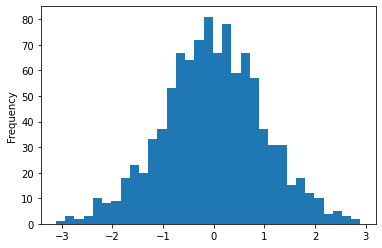

In [46]:
some_series = pd.Series(np.random.normal(size=1000))
some_series.plot(kind='hist', bins=33)

## - [операции с pd.DataFrame](https://pandas.pydata.org/docs/reference/frame.html)

API: pd.DataFrame.X

- `groupby`
- iterrows - забудьте про это
- rolling - скользящие окна
- query - симпатичный способ общаться с датафреймом
- corr - построить матрицу корреляций признаков
- drop - выкинуть какие-то столбцы / строки
- drop_duplicates
- reset_index - сбросить индекс к RangeIndex(0, N)
- sort_values - отсортировать по столбцу
- merge - `Merge with a database-style join`. Не используйте `pd.DataFrame.join`!
- sample
- assign - присвоить новые столбцы и вернуть результат как новый датафрейм
- to_csv, to_parquet - сохранить датафрейм. про parquet поговорим во втором семестре


### [`groupby`](https://pandas.pydata.org/docs/user_guide/groupby.html)

<img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*bufYBdgnVTtd2ckDTooCRw.png' width=600>

In [47]:
display(df.head(3))
df.Pclass.value_counts()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col_1,new_col_2,new_col_3
id_0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,112,0,484.0
id_1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,112,0,1444.0
id_2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,112,1,676.0


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [49]:
# SeriesGroupBy object
(
    df
    .groupby('Pclass', observed=False)['Age'] # SeriesGroupBy object
    .apply(np.mean) # Function application
)

# SeriesGroupBy object
(
    df
    .groupby('Pclass', observed=False)['Age'] # SeriesGroupBy object
    .transform(lambda x: x.mean()) # Function application
)

# # DataFrameGroupBy object
(
    df
    .groupby('Pclass', observed=False) # DataFrameGroupBy object
    .agg( # Function application with NamedAgg
        mean_age=pd.NamedAgg(column='Age', aggfunc='mean'),
        median_fare=pd.NamedAgg(column='Fare', aggfunc=lambda x: x.median())
    ) 
    .reset_index()
)

,Pclass,mean_age,median_fare
0,1,37.784352,60.2875
1,2,30.183859,14.2500
2,3,27.871527,8.0500


Доступные варианты функций:
- `apply`
- `agg`
- `transform`
- `filter`
- `pipe` - ни разу не встречал

## - [General functions](https://pandas.pydata.org/docs/reference/general_functions.html)

API: pd.X

- cut, qcut - нарезать числовой признак на бины
- concat - поставить датафреймы друг на друга или рядом друг с другом
- get_dummies - One-Hot Encoding
- to_numeric, to_datetime - перевести в числовой формат / в формат datetime64 
- date_range - интервал дат с заданной периодичностью / размером

## - [*Style](https://pandas.pydata.org/docs/user_guide/style.html)

In [50]:
df.drop(columns='new_col_3').head(5).style.background_gradient()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col_1,new_col_2
id_0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S,112,0
id_1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C,112,0
id_2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S,112,1
id_3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S,112,1
id_4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S,112,0
